In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
#for ipynb
%matplotlib inline
import yaml

In [2]:
#get list of files with data
in_dict = {'data':'../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results/'
          }

samples_yaml = '../TFBS_nucleosome_profiling_unfiltered_v2/config/samples.GC.yaml'
tfx_path = '../../metadata/delfi/analysis/Delfi_tumor_fraction_data.txt'
metadata_path = '../../../griffin_paper/data/delfi_metadata/analysis/matched_metadata_corrected.txt'

with open(samples_yaml, 'r') as f:
    samples = yaml.safe_load(f)
samples = samples['samples']
samples = list(samples.keys())  
    
in_files = {}
for group in in_dict.keys():
    in_dir = in_dict[group]
    in_files[group] = []
    for sample in samples:
        in_files[group].append(in_dir+'/'+sample+'/'+sample+'.uncorrected.coverage.tsv')
    print(group,len(in_files[group]))    

data 423


In [3]:
#get columns with coverage data
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [4]:
#import data
start_time = time.time()
data = pd.DataFrame()
for group in in_files.keys():
    for i,file in enumerate(in_files[group]):
        if i%100==0:
            print(i,'importing',file,np.round(time.time()-start_time))
        current = pd.read_csv(file,sep='\t')
        #current['site_group'] = group
        data = data.append(current, ignore_index=True)
        

0 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Bile_Duct_Cancer_CGPLPA114/Bile_Duct_Cancer_CGPLPA114.uncorrected.coverage.tsv 0.0
100 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Colorectal_Cancer_CGCRC321/Colorectal_Cancer_CGCRC321.uncorrected.coverage.tsv 4.0
200 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Healthy_CGPLH365/Healthy_CGPLH365.uncorrected.coverage.tsv 14.0
300 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Healthy_CGPLH479/Healthy_CGPLH479.uncorrected.coverage.tsv 25.0
400 importing ../TFBS_nucleosome_profiling_unfiltered_30000sites_v2/results//Pancreatic_Cancer_CGPLPA37/Pancreatic_Cancer_CGPLPA37.uncorrected.coverage.tsv 37.0


In [5]:
data.set_index('sample')

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,mean_coverage,central_coverage,amplitude,outlier_cutoff,exclude_zero_mappability,correction,number_of_sites,site_name,smoothing,CNA_normalization
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,1.00202,1.00723,0.98654,0.97407,1.00067,1.00261,1.01327,1.02989,1.04200,1.05074,...,0.95775,1.06722,1.03303,2.0,True,uncorrected,30000,AHR.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,1.00362,0.99956,0.98079,0.94998,0.95168,0.96384,0.96902,0.96853,0.98551,1.00614,...,1.00704,1.11717,0.85236,2.0,True,uncorrected,30000,AR.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,0.92729,0.94327,0.96773,0.96889,0.96966,0.98068,0.98911,0.99778,0.98743,0.98365,...,0.95271,1.02408,0.15633,2.0,True,uncorrected,30000,ARNT.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,0.94779,0.95632,0.95363,0.95146,0.96015,0.94502,0.93499,0.93318,0.93164,0.95083,...,1.00030,1.18756,0.36227,2.0,True,uncorrected,30000,ARNTL.hg38.30000,True,False
Bile_Duct_Cancer_CGPLPA114,1.01210,1.00677,1.00901,1.02737,1.00708,0.99388,0.99398,0.98211,0.97844,0.97451,...,0.98767,1.01609,0.21019,2.0,True,uncorrected,30000,ASCL1.hg38.30000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA95,0.99070,0.98308,0.96508,0.95844,0.95749,0.97805,0.97660,0.97828,0.99669,0.97973,...,0.96449,1.05304,0.37735,2.0,True,uncorrected,30000,ZNF467.hg38.30000,True,False
Pancreatic_Cancer_CGPLPA95,1.03186,1.01372,1.00791,0.97559,0.97105,0.97240,0.97292,0.95967,0.96984,0.95945,...,0.99022,1.12064,0.43030,2.0,True,uncorrected,30000,ZNF554.hg38.30000,True,False
Pancreatic_Cancer_CGPLPA95,0.99545,0.95567,0.93604,0.91401,0.91852,0.93382,0.92917,0.94528,0.97043,0.98084,...,0.92035,0.86106,3.38211,2.0,True,uncorrected,30000,ZNF580.hg38.30000,True,False


In [6]:
#get the metadata
#get the metadata
metadata1 = pd.read_csv(metadata_path, sep='\t')
metadata1 = metadata1[['new_sample_name','Stage','Age at Diagnosis', 'Gender']].set_index('new_sample_name') 
metadata2 = pd.read_csv(tfx_path, sep='\t')
metadata2 = metadata2[['sample','tumor_fraction','sample_type']].set_index('sample') 
metadata = metadata1.merge(metadata2, left_index = True, right_index=True)
metadata = metadata.reset_index()
metadata = metadata.rename(columns = {'index':'sample'})
metadata['status'] = np.where(metadata['sample_type'].str.contains('ancer'),1,0)
metadata['Stage'] = metadata['Stage'].str.strip(' ')

metadata_columns = ['sample','tumor_fraction','status','sample_type','Stage','Age at Diagnosis', 'Gender']
metadata = metadata[metadata_columns]
print("metadata:",len(metadata))


#merge with data
print(len(data))
data = data.merge(metadata, on = 'sample')
print(len(data))

metadata: 423
114210
114210


In [7]:
data

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,site_name,smoothing,CNA_normalization,sample,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender
0,1.00202,1.00723,0.98654,0.97407,1.00067,1.00261,1.01327,1.02989,1.04200,1.05074,...,AHR.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
1,1.00362,0.99956,0.98079,0.94998,0.95168,0.96384,0.96902,0.96853,0.98551,1.00614,...,AR.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
2,0.92729,0.94327,0.96773,0.96889,0.96966,0.98068,0.98911,0.99778,0.98743,0.98365,...,ARNT.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
3,0.94779,0.95632,0.95363,0.95146,0.96015,0.94502,0.93499,0.93318,0.93164,0.95083,...,ARNTL.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
4,1.01210,1.00677,1.00901,1.02737,1.00708,0.99388,0.99398,0.98211,0.97844,0.97451,...,ASCL1.hg38.30000,True,False,Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114205,0.99070,0.98308,0.96508,0.95844,0.95749,0.97805,0.97660,0.97828,0.99669,0.97973,...,ZNF467.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F
114206,1.03186,1.01372,1.00791,0.97559,0.97105,0.97240,0.97292,0.95967,0.96984,0.95945,...,ZNF554.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F
114207,0.99545,0.95567,0.93604,0.91401,0.91852,0.93382,0.92917,0.94528,0.97043,0.98084,...,ZNF580.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F
114208,0.98180,0.99701,0.99592,0.99879,0.98574,0.97620,0.95175,0.94988,0.94861,0.96482,...,ZNF770.hg38.30000,True,False,Pancreatic_Cancer_CGPLPA95,0.04484,1,Pancreatic_Cancer,II,64.0,F


In [8]:
print(len(data['site_name'].unique()))
print(len(data['sample'].unique()))
print(len(data))
print(len(data['site_name'].unique())*len(data['sample'].unique())*len(data['correction'].unique()))


270
423
114210
114210


In [9]:
data['number_of_sites'].unique()

array([30000])

In [10]:
data['Stage'].unique()

array(['II', 'IV', 'I', 'III', 'X', '0', nan], dtype=object)

In [11]:
#get the key columns
data = data[metadata_columns+['site_name','correction',
                              'central_coverage','amplitude','mean_coverage']+str_plot_columns]
print(len(data))

site_groups = in_dict.keys()

site_names = data['site_name'].unique()

for group,df in data.groupby('correction'):
    print(group,len(df['site_name'].unique()))

    #df.to_csv('merged_data/'+group+'_data_with_features.txt', sep='\t', index=False)
    
    #reformat for logistic regression
    reformatted = df[metadata_columns+['site_name','correction','central_coverage','amplitude','mean_coverage']]
    reformatted = reformatted.set_index(metadata_columns+['correction','site_name']).unstack()
    new_column_names = []
    for item in reformatted.columns.values:
        new_column_names.append('_'.join(item))
    reformatted.columns = new_column_names
    group = group.replace("_",'-') #rename group
    reformatted.to_csv('merged_data/'+group+'_reformatted.txt', sep='\t')
    print(reformatted.shape)
    

114210
uncorrected 270
(423, 810)


In [12]:
810/3

270.0

In [13]:
reformatted

,,,,,,,,central_coverage_AHR.hg38.30000,central_coverage_AR.hg38.30000,central_coverage_ARNT.hg38.30000,central_coverage_ARNTL.hg38.30000,central_coverage_ASCL1.hg38.30000,central_coverage_ASCL2.hg38.30000,central_coverage_ATF1.hg38.30000,central_coverage_ATF2.hg38.30000,central_coverage_ATF3.hg38.30000,central_coverage_ATF4.hg38.30000,...,mean_coverage_ZNF317.hg38.30000,mean_coverage_ZNF341.hg38.30000,mean_coverage_ZNF35.hg38.30000,mean_coverage_ZNF384.hg38.30000,mean_coverage_ZNF449.hg38.30000,mean_coverage_ZNF467.hg38.30000,mean_coverage_ZNF554.hg38.30000,mean_coverage_ZNF580.hg38.30000,mean_coverage_ZNF770.hg38.30000,mean_coverage_ZSCAN16.hg38.30000
sample,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender,correction,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.02606,1,Bile_Duct_Cancer,II,NaN,F,uncorrected,1.06722,1.11717,1.02408,1.18756,1.01609,1.08066,0.81435,1.06695,0.96961,1.06176,...,1.00752,0.91854,0.94908,0.93340,0.99713,0.93092,0.97077,0.90365,0.97066,0.93077
Bile_Duct_Cancer_CGPLPA115,0.05922,1,Bile_Duct_Cancer,IV,NaN,M,uncorrected,1.10723,1.09618,1.06914,1.33432,1.08044,1.11499,0.84875,1.04697,0.99432,1.01568,...,1.00431,0.95741,0.96084,0.92953,0.98947,0.95460,0.98455,0.93243,0.97440,0.92678
Bile_Duct_Cancer_CGPLPA117,0.00000,1,Bile_Duct_Cancer,II,NaN,M,uncorrected,0.94728,1.09712,0.98732,1.05003,0.98207,1.03299,0.73094,1.05869,0.89224,1.05450,...,1.01588,0.89749,0.95489,0.93426,1.00210,0.90678,0.96162,0.88979,0.97040,0.93329
Bile_Duct_Cancer_CGPLPA118,0.02789,1,Bile_Duct_Cancer,I,68.0,F,uncorrected,1.05081,1.13260,1.03668,1.10508,1.05246,1.06130,0.75670,1.07377,1.00032,1.11488,...,1.01726,0.88822,0.94742,0.93093,1.00242,0.90929,0.96596,0.88502,0.96078,0.92421
Bile_Duct_Cancer_CGPLPA122,0.04373,1,Bile_Duct_Cancer,II,62.0,F,uncorrected,1.02975,1.07336,1.03555,1.17246,1.00339,1.00607,0.70203,1.06327,0.94089,1.01024,...,1.00657,0.90035,0.94141,0.92500,0.98695,0.91329,0.96322,0.88119,0.96414,0.92245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA86,0.02980,1,Pancreatic_Cancer,II,66.0,M,uncorrected,1.02610,1.09609,0.98896,1.13159,0.96825,1.03302,0.67617,1.08266,0.92022,1.01572,...,1.00570,0.89017,0.94752,0.92883,0.99602,0.90254,0.96215,0.86694,0.96141,0.92428
Pancreatic_Cancer_CGPLPA92,0.02493,1,Pancreatic_Cancer,II,72.0,M,uncorrected,1.00914,1.11219,1.01338,1.04890,0.96941,1.01545,0.70567,1.03843,0.85443,1.06331,...,1.01526,0.88222,0.94519,0.94911,0.99698,0.90610,0.95095,0.88853,0.96833,0.93114
Pancreatic_Cancer_CGPLPA93,0.05063,1,Pancreatic_Cancer,II,48.0,M,uncorrected,1.03565,1.10869,1.06358,1.26371,1.07869,1.05943,0.79981,1.04474,0.93928,1.02579,...,1.00876,0.91303,0.93874,0.92339,0.98828,0.93062,0.96591,0.89679,0.96244,0.92463


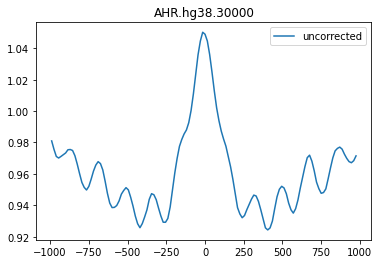

In [14]:
#plot
for site_name in data['site_name'].unique():
    for site_group in data['correction'].unique():
        current = data[(data['site_name']==site_name) & (data['correction']==site_group)][str_plot_columns].mean()
        plt.plot(plot_columns,current, label=site_group)
    plt.title(site_name)
    plt.legend()
    break




fft real -0.26776573095457706
fft imag -0.08952811763471719
fft magn 0.2823362720602061
sum x coords -0.2677657309545921
sum y coords -0.08952811763473956
magnitude: 0.28233627206022743


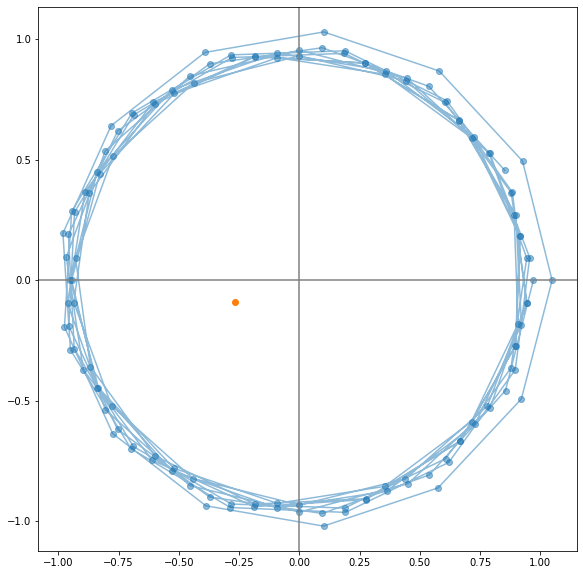

In [15]:
fft_columns = np.arange(-960,960,15)
str_fft_columns = [str(m) for m in fft_columns]

#plot out what the fft is doing for a given frequency
demo_res = np.fft.fft(current[str_fft_columns])
demo_signal = current[str_fft_columns]

frequency = 10
print('fft real', demo_res[frequency].real)
print('fft imag', demo_res[frequency].imag)
print('fft magn',np.abs(demo_res[frequency]))

#get angles for rotation
angles = np.linspace(0,2*np.pi,len(demo_signal)+1)
angles = -angles[0:-1]

#wrapped at frequency
heights = np.sin(angles*frequency)*demo_signal
widths = np.cos(angles*frequency)*demo_signal
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(widths,heights, alpha = 0.5)
ax.scatter(widths,heights, alpha = 0.5)
ax.set_aspect('equal')
ax.scatter(sum(widths),sum(heights))
ax.axvline(0, color = 'grey')
ax.axhline(0, color = 'grey')
print('sum x coords',sum(widths))
print('sum y coords',sum(heights))
print('magnitude:',np.sqrt(sum(widths)**2+sum(heights)**2))

In [16]:
# from scipy.signal import find_peaks
# plt.plot(fft_columns,current)
# peaks =  [fft_columns[m] for m in find_peaks(current)[0]]
# plt.scatter(peaks,[.99 for m in peaks])
# print(peaks)

# spacing = []
# for i in range(len(peaks)-1):
#     spacing.append(peaks[i+1]-peaks[i])
# np.mean(spacing)